In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

$$
\vec x_{n+1} = \vec x_{n} + \delta \vec g \left( \vec x_n + \frac{\delta}{2} g(x_x,t_n) , t_n + \frac{\delta}{2} \right) 
$$

In [14]:
def pendulo_cff(x , t , args=[0,0,0]):
    # x = (theta, v_theta)
    # args = Amplitud , omega_1 , gamma
    return np.array([ x[1] , -np.sin(x[0]) - args[2]*x[1] + args[0]*np.cos(args[1]*t)])

def RK2(g,x0,t,args=None):
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        sol[:,i+1] += sol[:,i]
        x_intermedio = sol[:,i] + 0.5*h*g(sol[:,i],t[i] , args)
        sol[:,i+1] += h*g( x_intermedio , t[i]+0.5*h , args)
    return sol

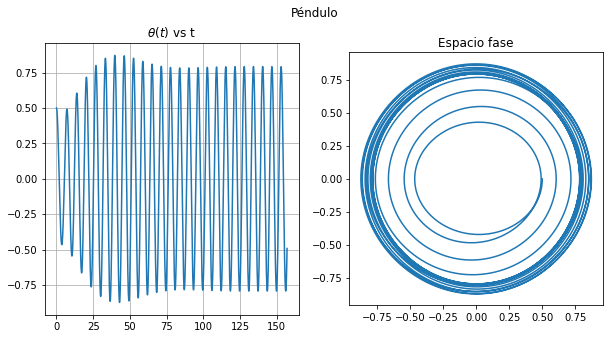

In [23]:
t = np.arange(0,50*np.pi,0.01)
sol = RK2(pendulo_cff,[0.5,0],t,args=[0.1,1,0.1])
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(10,5))
figura.suptitle('Péndulo')
graf1.set_title(r'$\theta (t)$ vs t')
graf1.plot(t,sol[0,:])
graf1.grid()
graf2.set_title('Espacio fase')
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')

$$
\vec x_{n+1} = \vec x_{n} + \frac{\delta}{6}(k_1 + 2k_2 +2k_3 +k_4)
$$

$$
k_1 =  \vec g \left( \vec x_n , t_n  \right) \\
k_2 =  \vec g \left( \vec x_n + \frac{\delta}{2} k_1 , t_n + \frac{\delta}{2} \right) \\
k_3 =  \vec g \left( \vec x_n + \frac{\delta}{2} k_2 , t_n + \frac{\delta}{2} \right) \\
k_4 =  \vec g \left( \vec x_n +  \delta k_3 , t_n + \delta \right) \\
$$

In [17]:
def RK4(g,x0,t,args=None):
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        k1 = g(sol[:,i],t[i] , args)
        k2 = g(sol[:,i] + 0.5*h*k1 , t[i]+0.5*h , args)
        k3 = g(sol[:,i] + 0.5*h*k2 , t[i]+0.5*h , args)
        k4 = g(sol[:,i] + h*k3 , t[i]+h , args)
        sol[:,i+1] += sol[:,i] + (k1 + 2*k2 + 2*k3 + k4)*(h/6)
    return sol

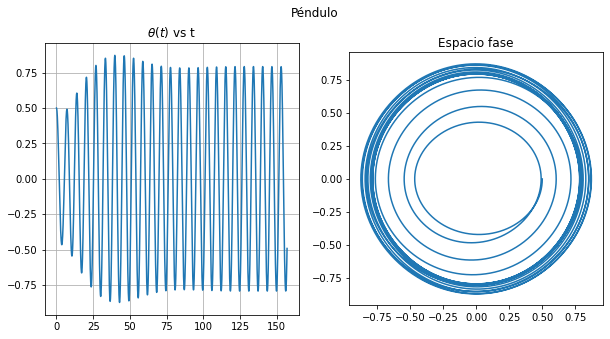

In [24]:
t = np.arange(0,50*np.pi,0.01)
sol = RK4(pendulo_cff,[0.5,0],t,args=[0.1,1,0.1])
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(10,5))
figura.suptitle('Péndulo')
graf1.set_title(r'$\theta (t)$ vs t')
graf1.plot(t,sol[0,:])
graf1.grid()
graf2.set_title('Espacio fase')
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')

(None, None)

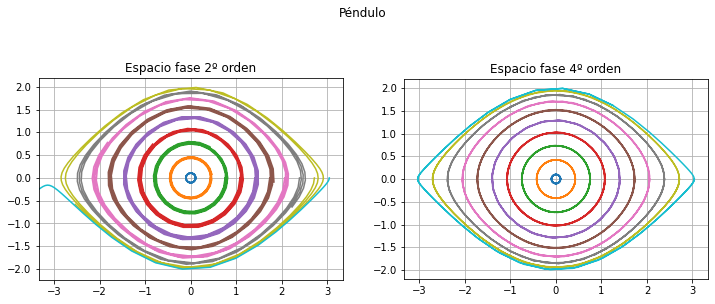

In [35]:
t = np.arange(0,10*np.pi,0.3)
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(12,5))
figura.suptitle('Péndulo')
graf1.set_title(r'Espacio fase 2º orden')
ci = np.linspace(0.1,np.pi-0.1,10)
for ci_i in ci:
    sol_k2 = RK2(pendulo_cff,[ci_i,0],t,args=[0.0,0.0,0.0])
    sol_k4 = RK4(pendulo_cff,[ci_i,0],t,args=[0.0,0.0,0.0])
    graf1.plot(sol_k2[0,:],sol_k2[1,:])
    graf2.plot(sol_k4[0,:],sol_k4[1,:])

graf2.set_title('Espacio fase 4º orden')
graf1.set_xlim([-np.pi-0.2,np.pi+0.2])
graf1.grid(),graf2.grid()
graf1.set_aspect('equal'),graf2.set_aspect('equal')

In [56]:
t = np.arange(0,10*np.pi,0.1)

In [45]:
%%timeit
sol_k2 = RK2(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])

1.03 ms ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [46]:
%%timeit
sol_k4 = RK4(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])

2.18 ms ± 7.15 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


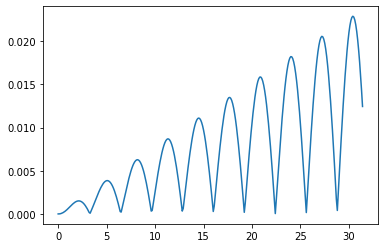

In [57]:
sol_k2 = RK2(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])
sol_k4 = RK4(pendulo_cff,[0.5,0],t,args=[0.0,0.0,0.0])
error_rel = abs(sol_k2[0,:]-sol_k4[0,:])
plt.plot(t,error_rel)
plt.show()

array([ 0.5       ,  0.49760287,  0.49042201,  0.47852064,  0.4620041 ,
        0.44101972,  0.41575646,  0.38644434,  0.35335353,  0.31679299,
        0.27710851,  0.23468026,  0.18991951,  0.14326474,  0.09517712,
        0.04613528, -0.00337034, -0.05284347, -0.10178824, -0.14971534,
       -0.19614799, -0.24062758, -0.28271875, -0.32201392, -0.35813709,
       -0.39074695, -0.41953937, -0.44424925, -0.46465175, -0.48056326,
       -0.49184187, -0.49838769, -0.50014299, -0.4970923 , -0.48926235,
       -0.47672213, -0.45958271, -0.43799716, -0.4121601 , -0.38230714,
       -0.3487139 , -0.31169455, -0.27159985, -0.2288145 , -0.18375385,
       -0.13685992, -0.08859671, -0.03944497,  0.01010351,  0.059552  ,
        0.10840495,  0.15617425,  0.20238508,  0.24658155,  0.28833168,
        0.32723181,  0.36291036,  0.39503086,  0.42329426,  0.44744078,
        0.46725109,  0.48254714,  0.49319267,  0.49909349,  0.50019759,
        0.49649519,  0.48801879,  0.47484309,  0.45708492,  0.43